In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
#from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [2]:
sam = pd.read_csv("C:/Users/lohitr/Downloads/Hackathon/IoT traffic/train_aWnotuB.csv")

In [3]:
sam

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
sam.columns


Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [5]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
sam.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
for col in sam.columns:
    print(f"{col}: {sam[col].nunique()}")

DateTime: 14592
Junction: 4
Vehicles: 141
ID: 48120


,Total,Percent
ID,0,0.0
Vehicles,0,0.0
Junction,0,0.0
DateTime,0,0.0


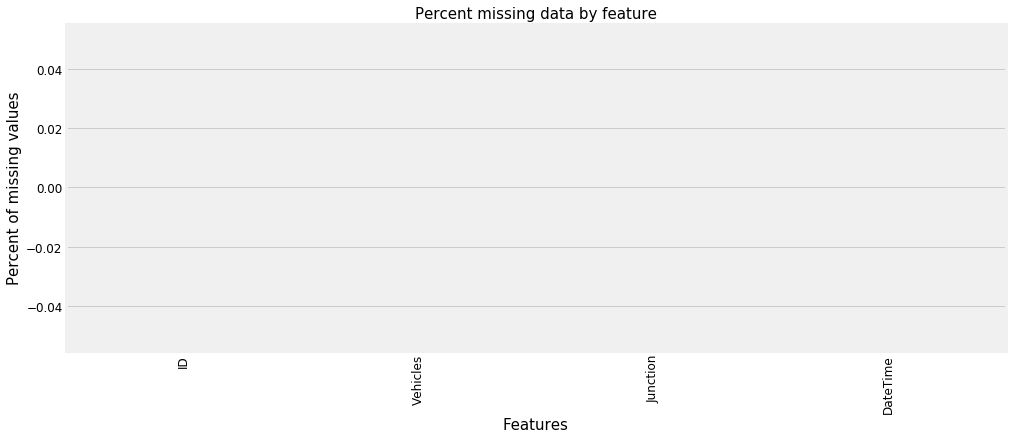

In [8]:
total = sam.isnull().sum().sort_values(ascending=False)
percent = (sam.isnull().sum()/sam.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

# Converting to DateTime Format

In [9]:
###Converting to datetime format

sam.index = pd.to_datetime(sam['DateTime'], format='%Y-%m')

In [10]:
sam.drop(['DateTime','ID'],axis=1, inplace=True)

In [11]:
sam

,Junction,Vehicles
DateTime,,
2015-11-01 00:00:00,1,15
2015-11-01 01:00:00,1,13
2015-11-01 02:00:00,1,10
2015-11-01 03:00:00,1,7
2015-11-01 04:00:00,1,9
...,...,...
2017-06-30 19:00:00,4,11
2017-06-30 20:00:00,4,30
2017-06-30 21:00:00,4,16


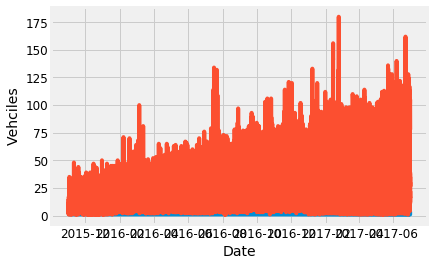

In [13]:
# graph

plt.xlabel("Date")
plt.ylabel("Vehciles")
plt.plot(sam)

# Rolling Statistics mean & Std 

In [29]:
rolmean= sam.rolling(window=365).mean()
rolstd= sam.rolling(window=365).std()

print(rolmean, rolstd)

                     Junction  Vehicles
DateTime                               
2015-11-01 00:00:00       NaN       NaN
2015-11-01 01:00:00       NaN       NaN
2015-11-01 02:00:00       NaN       NaN
2015-11-01 03:00:00       NaN       NaN
2015-11-01 04:00:00       NaN       NaN
...                       ...       ...
2017-06-30 19:00:00       4.0  8.739726
2017-06-30 20:00:00       4.0  8.800000
2017-06-30 21:00:00       4.0  8.824658
2017-06-30 22:00:00       4.0  8.860274
2017-06-30 23:00:00       4.0  8.876712

[48120 rows x 2 columns]                      Junction  Vehicles
DateTime                               
2015-11-01 00:00:00       NaN       NaN
2015-11-01 01:00:00       NaN       NaN
2015-11-01 02:00:00       NaN       NaN
2015-11-01 03:00:00       NaN       NaN
2015-11-01 04:00:00       NaN       NaN
...                       ...       ...
2017-06-30 19:00:00       0.0  4.771790
2017-06-30 20:00:00       0.0  4.899652
2017-06-30 21:00:00       0.0  4.913197
2017-06-30 22:

# Plot for  Rolling  Statistics

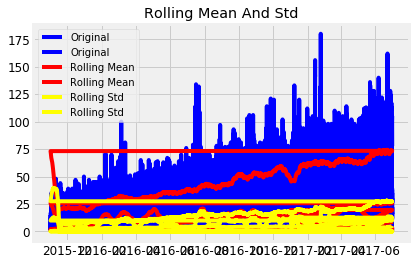

In [30]:
orig = plt.plot(sam, color='blue', label='Original')
mean= plt.plot(rolmean,color='red',label='Rolling Mean')
std= plt.plot(rolstd,color='yellow',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean And Std')
plt.show(block=False)

# Dickey-Fuller Test

In [31]:
print("results of Dickey:")
dftest = adfuller(sam['Vehicles'],autolag='AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No.of Obseravns Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

results of Dickey:
Test Statistic         -7.518278e+00
p-value                 3.851060e-11
#Lags Used              5.700000e+01
No.of Obseravns Used    4.806200e+04
Critical Value (1%)    -3.430486e+00
Critical Value (5%)    -2.861600e+00
Critical Value (10%)   -2.566802e+00
dtype: float64


 # Estimate trend 

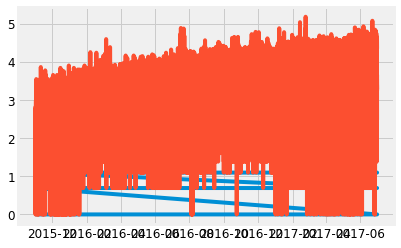

In [40]:
sam_log = np.log(sam)
plt.plot(sam_log)

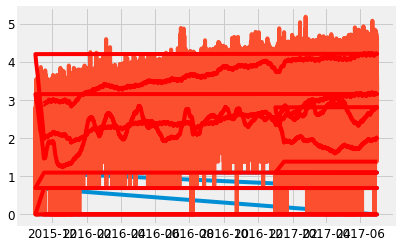

In [41]:
movingAvg = sam_log.rolling(window=365).mean()
movingSTD= sam_log.rolling(window=365).std()
plt.plot(sam_log)
plt.plot(movingAvg,color='red')

In [42]:
MinusMovingAvg= sam_log- movingAvg
MinusMovingAvg.head(12)

# Remove Nan Values

MinusMovingAvg.dropna(inplace=True)
MinusMovingAvg.head(50)

,Junction,Vehicles
DateTime,,
2015-11-16 04:00:00,0.0,-0.397913
2015-11-16 05:00:00,0.0,-0.397301
2015-11-16 06:00:00,0.0,-0.317259
2015-11-16 07:00:00,0.0,-0.244073
2015-11-16 08:00:00,0.0,-0.319876
2015-11-16 09:00:00,0.0,-0.113813
2015-11-16 10:00:00,0.0,0.367677
2015-11-16 11:00:00,0.0,0.151782
2015-11-16 12:00:00,0.0,0.362126


In [43]:
def stationarity(timeseries):
    
    movingAvg=timeseries.rolling(window=365).mean()
    movingStd=timeseries.rolling(window=365).std()
    
    #Plot Rolling Statistics
    orig=plt.plot(timeseries, color='blue',label='Orginal')
    Avg=plt.plot(movingAvg, color='blue',label='movingAvg')
    Std=plt.plot(movingStd, color='blue',label='movingStd')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results')
    dftest =adfuller(timeseries['Vehicles'],autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No.of Obseravns Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)
    

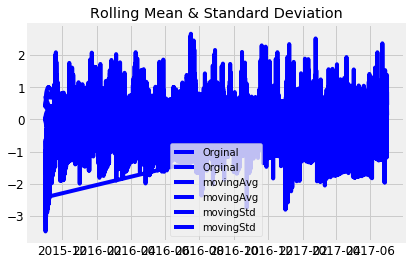

Results
Test Statistic            -20.919167
p-value                     0.000000
#Lags Used                 57.000000
No.of Obseravns Used    47698.000000
Critical Value(1%)         -3.430487
Critical Value(5%)         -2.861601
Critical Value(10%)        -2.566802
dtype: float64


In [44]:
stationarity(MinusMovingAvg)

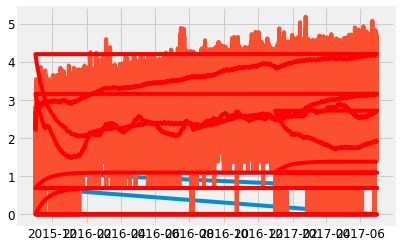

In [45]:
exponentialDecayWeightAverage=sam_log.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(sam_log)
plt.plot(exponentialDecayWeightAverage,color='red')

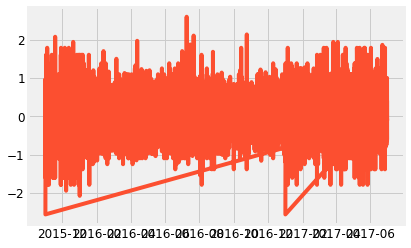

In [46]:
dataLogShifting = sam_log-sam_log.shift()
plt.plot(dataLogShifting)

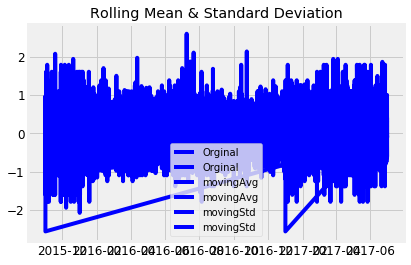

Results
Test Statistic            -34.145554
p-value                     0.000000
#Lags Used                 57.000000
No.of Obseravns Used    48061.000000
Critical Value(1%)         -3.430486
Critical Value(5%)         -2.861600
Critical Value(10%)        -2.566802
dtype: float64


In [47]:
dataLogShifting.dropna(inplace=True)
stationarity(dataLogShifting)

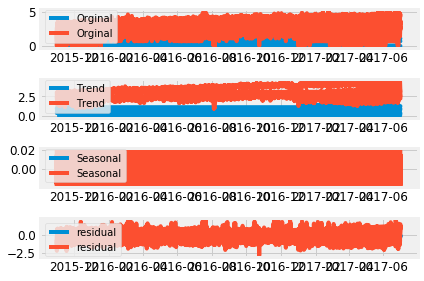

In [56]:
decomposition= seasonal_decompose(sam_log,freq=30)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(sam_log,label='Orginal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

plt.tight_layout()

#decomposedLogData=residual
#decomposedLogData.dropna(inplace=True).values
#stationarity(decomposedLogData)


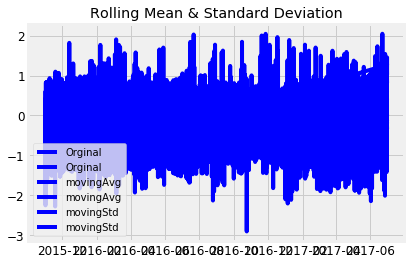

Results
Test Statistic            -44.516210
p-value                     0.000000
#Lags Used                 57.000000
No.of Obseravns Used    48032.000000
Critical Value(1%)         -3.430486
Critical Value(5%)         -2.861600
Critical Value(10%)        -2.566802
dtype: float64


In [60]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
stationarity(decomposedLogData)

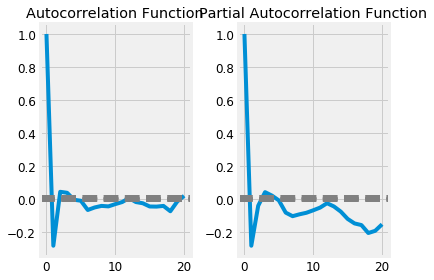

In [67]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf =acf(dataLogShifting.Vehicles,nlags=20)
lag_pacf=pacf(dataLogShifting.Vehicles, nlags=20,method='ols')

#Plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



C:\Users\lohitr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lohitr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


TypeError: not all arguments converted during string formatting

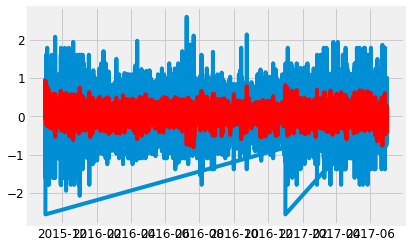

In [72]:
from statsmodels.tsa.arima_model import  ARIMA

#AR Model

model=ARIMA(sam_log.Vehicles,order=(2,1,2))
results_ar=model.fit(disp=1)
plt.plot(dataLogShifting.Vehicles)
plt.plot(results_ar.fittedvalues,color='red')
plt.title('RSS'% sum((results_ar.fittedvalues-dataLogShifting['Vehicles'])**2))
print('Plot AR Model')


C:\Users\lohitr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lohitr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


TypeError: not all arguments converted during string formatting

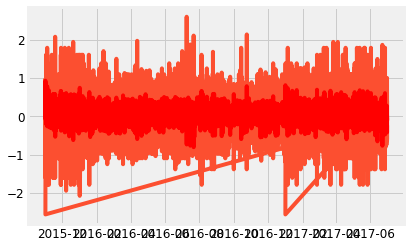

In [74]:
model=ARIMA(sam_log.Vehicles,order=(0,1,2))
results_ma=model.fit(disp=1)
plt.plot(dataLogShifting)
plt.plot(results_ar.fittedvalues,color='red')
plt.title('RSS'% sum((results_ar.fittedvalues-dataLogShifting['Vehicles'])**2))
print('Plot AR Model')


In [75]:
predict_arima_diff= pd.Series(results_ar.fittedvalues,copy=True)
print(predict_arima_diff.head())

DateTime
2015-11-01 01:00:00   -0.000013
2015-11-01 02:00:00    0.040839
2015-11-01 03:00:00    0.087636
2015-11-01 04:00:00    0.140315
2015-11-01 05:00:00   -0.014797
dtype: float64


In [76]:
pred_arima_cumsum=predict_arima_diff.cumsum()
print(pred_arima_cumsum)

DateTime
2015-11-01 01:00:00   -0.000013
2015-11-01 02:00:00    0.040825
2015-11-01 03:00:00    0.128461
2015-11-01 04:00:00    0.268776
2015-11-01 05:00:00    0.253979
                         ...   
2017-06-30 19:00:00   -1.670989
2017-06-30 20:00:00   -1.634403
2017-06-30 21:00:00   -2.054231
2017-06-30 22:00:00   -2.030601
2017-06-30 23:00:00   -2.266923
Length: 48119, dtype: float64


In [79]:
pred_arima_log=pd.Series(sam_log['Vehicles'],index=sam_log.index)
pred_arima_log=pred_arima_log.add(pred_arima_cumsum,fill_value=0)
pred_arima_log.head()

DateTime
2015-11-01   -28.380100
2015-11-01   -13.283181
2015-11-01   -29.296390
2015-11-01   -14.199472
2015-11-01   -28.890925
dtype: float64

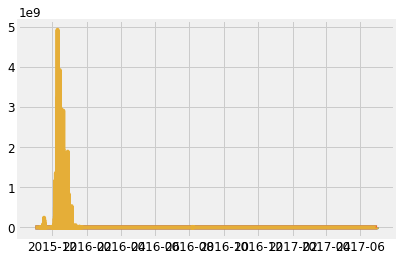

In [80]:
predi_arima= np.exp(pred_arima_log)
plt.plot(sam)
plt.plot(predi_arima)


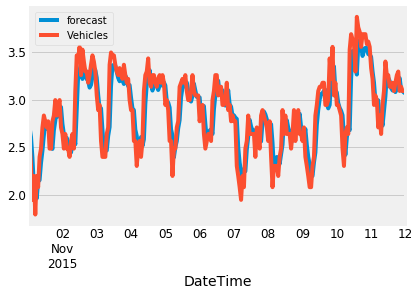

In [82]:
results_ar.plot_predict(1,264)
x=results_ar.forecast(steps=120)

In [83]:
x[1]

array([0.28502309, 0.33743956, 0.37915431, 0.40505301, 0.42362182,
       0.43677558, 0.4463896 , 0.45349655, 0.45883361, 0.46289482,
       0.46602824, 0.46847952, 0.47042473, 0.4719911 , 0.47327144,
       0.47433395, 0.47522922, 0.47599502, 0.4766598 , 0.47724516,
       0.47776762, 0.47823992, 0.47867196, 0.47907151, 0.47944468,
       0.47979633, 0.48013034, 0.48044985, 0.48075737, 0.48105496,
       0.48134431, 0.48162678, 0.48190352, 0.48217544, 0.48244333,
       0.48270784, 0.48296948, 0.48322871, 0.4834859 , 0.48374135,
       0.48399533, 0.48424805, 0.4844997 , 0.48475042, 0.48500035,
       0.48524959, 0.48549823, 0.48574635, 0.48599401, 0.48624127,
       0.48648816, 0.48673473, 0.48698101, 0.48722702, 0.48747279,
       0.48771834, 0.48796369, 0.48820884, 0.4884538 , 0.4886986 ,
       0.48894323, 0.4891877 , 0.48943203, 0.4896762 , 0.48992023,
       0.49016413, 0.49040788, 0.49065151, 0.490895  , 0.49113836,
       0.4913816 , 0.49162471, 0.49186769, 0.49211055, 0.49235

In [84]:
len(x[1])

120